# Project 1 Dicoding Machine Learning Terapan: Student Performance Dataset
### Nama : Junathan Richie
### Email : jonathanrichie05@gmail.com
### Username : junathan_richie_NU9i

#### Setup Dependencies

Setup dependencies yang dibutuhkan seperti tensorflow, scikit-learn, seaborn, dan pandas.

In [2]:
!python3 -m venv tes
!source tes/bin/activate
%pip install kaggle
%pip install seaborn
%pip install scikit-learn
%pip install xgboost
%pip install tensorflow --timeout=600
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Loading

In [4]:
!kaggle datasets download rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
students-performance-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip -o students-performance-dataset.zip 

Archive:  students-performance-dataset.zip
  inflating: Student_performance_data _.csv  


In [6]:
df = pd.read_csv("/home/kali/ML/dicoding/Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


#### Preprocessing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Dari data di atas, kita mendapat informasi bahwa seluruh data dalam bentuk int64 dan float64. Ini berarti seluruh data kategorikal sudah dikodekan menjadi data numerik. Pada platform kaggle didapat informasi sebagai berikut.
<br>
Notes from dataset in kaggle:<br>
Student ID <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;StudentID: A unique identifier assigned to each student (1001 to 3392). <br>
Demographic Details<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Age: The age of the students ranges from 15 to 18 years. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Gender: Gender of the students, where 0 represents Male and 1 represents Female. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ethnicity: The ethnicity of the students, coded as follows: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0: Caucasian<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1: African American<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2: Asian<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3: Other<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ParentalEducation: The education level of the parents, coded as follows:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0: None<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1: High School<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2: Some College<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3: Bachelor's<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4: Higher<br>
Study Habits<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Absences: Number of absences during the school year, ranging from 0 to 30.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.<br>
Parental Involvement<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ParentalSupport: The level of parental support, coded as follows:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0: None<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1: Low<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2: Moderate<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3: High<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4: Very High<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Extracurricular Activities<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.<br>
Academic Performance<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.<br>
Grade Class<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;GradeClass: Classification of students' grades based on GPA:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0: 'A' (GPA >= 3.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1: 'B' (3.0 <= GPA < 3.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2: 'C' (2.5 <= GPA < 3.0)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3: 'D' (2.0 <= GPA < 2.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4: 'F' (GPA < 2.0)<br>

In [8]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Berdasarkan fungsi describe di atas tidak terlihat keanehan pada data. Akan tetapi kolom StudentID tidak memiliki keterkaitan dengan tujuan dan tidak berpengaruh terhadap prediksi GPA dari siswa sehingga dapat didrop. Selain itu, kolom GradeClass juga dapat didrop karena menunjukkan hal yang sama dengan kolom GPA tetapi hanya berbeda bentuk (GradeClass dalam bentuk kategorikal).

In [9]:
# Drop StudentID Column karena tidak memiliki keterkaitan dengan tujuan
df=df.drop(labels="StudentID", axis=1)
# Drop GradeClass Column karena menunjukkan hal yang sama dengan academic performance
df=df.drop(labels="GradeClass", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 243.1 KB


#### Explaratory Data Analysis

Langkah selanjutnya adalah pengecekan outlier dengan boxplot

<Axes: xlabel='StudyTimeWeekly'>

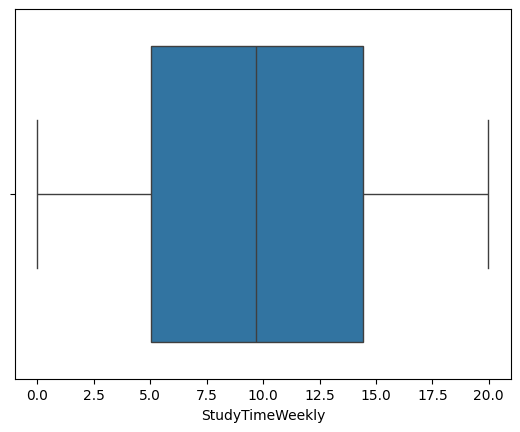

In [10]:
# Detect outliers
sns.boxplot(x=df["StudyTimeWeekly"])

<Axes: xlabel='Absences'>

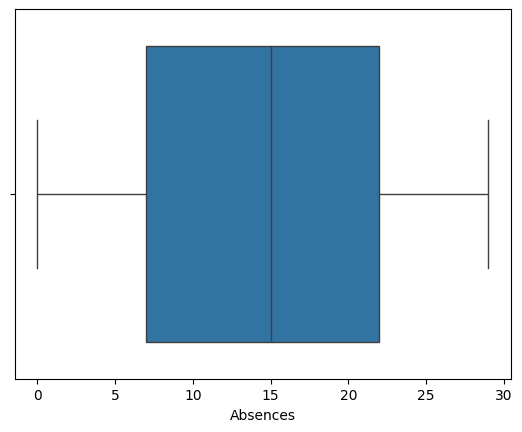

In [11]:
# Detect outliers
sns.boxplot(x=df["Absences"])

Berdasarkan hasil pengecekan di atas, ditemukan tidak ada outlier pada data numerik yaitu absences dan study time weekly. <br>
Langkah selanjutnya adalah Explaratory Data Analysis dengan Univariate Analysis. Univariate Analysis pada data categorical dilakukan dengan mapping dari index menjadi bentuk kalimat. 

In [12]:
numerical_features = ['StudyTimeWeekly', 'Absences', 'Age', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

        jumlah sampel  persentase
Gender                           
Female           1222        51.1
Male             1170        48.9


<Axes: title={'center': 'Gender'}, xlabel='Gender'>

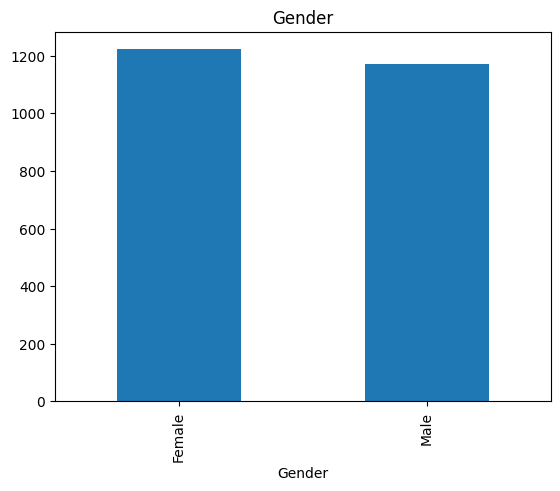

In [13]:
# Feature Gender
feature = categorical_features[0]
index_to_gender_map = {0: 'Male', 1: 'Female'}
gender_to_index_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(index_to_gender_map)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

 Gender pada data hampir setara dengan female sebanyak 1222 (51,1%) dan male sebanyak 1170 (48,9%).

                  jumlah sampel  persentase
Ethnicity                                  
Caucasian                  1207        50.5
African American            493        20.6
Asian                       470        19.6
Other                       222         9.3


<Axes: title={'center': 'Ethnicity'}, xlabel='Ethnicity'>

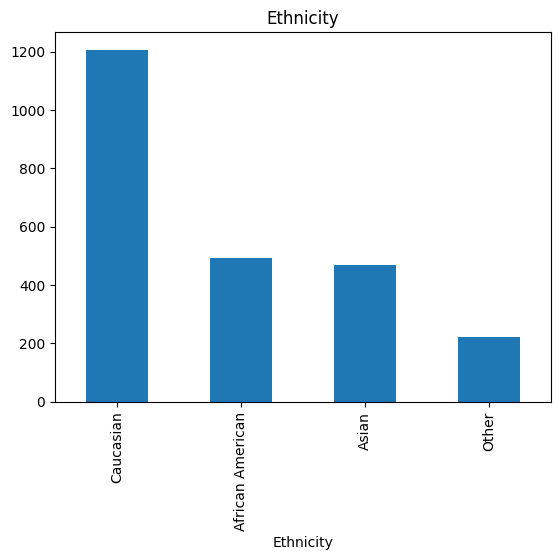

In [14]:
# Feature Ethnicity
'''
0: Caucasian
1: African American
2: Asian
3: Other
'''
feature = categorical_features[1]
index_to_ethnicity_map = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3:'Other'}
ethnicity_to_index_map = {'Caucasian':0, 'African American':1, 'Asian':2, 'Other' : 3}
df['Ethnicity'] = df['Ethnicity'].map(index_to_ethnicity_map)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Setengah dari kelompok etnis data terdiri dari Caucasian sebanyak 1207 (50,5%). Data-data lainnya yaitu African American sebanyak 493 (20,6%), Asian sebanyak 470(19,6%), dan Other (lainnya) sebanyak 222 (9,3%).

                   jumlah sampel  persentase
ParentalEducation                           
Some College                 934        39.0
High School                  728        30.4
Bachelor's                   367        15.3
None                         243        10.2
Higher                       120         5.0


<Axes: title={'center': 'ParentalEducation'}, xlabel='ParentalEducation'>

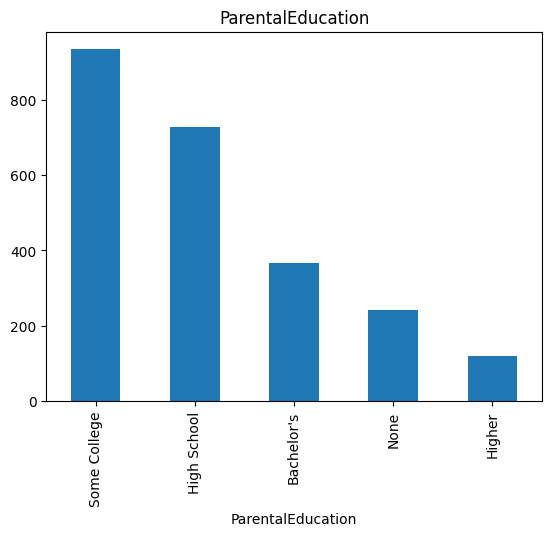

In [15]:
# Feature Parental Education
'''
ParentalEducation: The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher
'''
index_to_parental_education = {0: 'None', 1: 'High School', 2: 'Some College', 3:'Bachelor\'s', 4:'Higher'}
parental_education_to_index = {'None': 0, 'High School': 1, 'Some College': 2, 'Bachelor\'s': 3, 'Higher': 4}
feature = categorical_features[2]
df['ParentalEducation'] = df['ParentalEducation'].map(index_to_parental_education)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Data dari ParentalEducation terdiri dari Some College sebanyak 934 (39,0%), High School sebanyak 728 (30,4%), Bachelor's sebanyak 367 (15,3%), None sebanyak 243 (10,2%), dan Higher sebanyak 120 (5,0%). Hal ini menunjukkan bahwa sebagian besar orang tua memiliki tingkat pendidikan menengah ke atas. Parental

          jumlah sampel  persentase
Tutoring                           
No                 1671        69.9
Yes                 721        30.1


<Axes: title={'center': 'Tutoring'}, xlabel='Tutoring'>

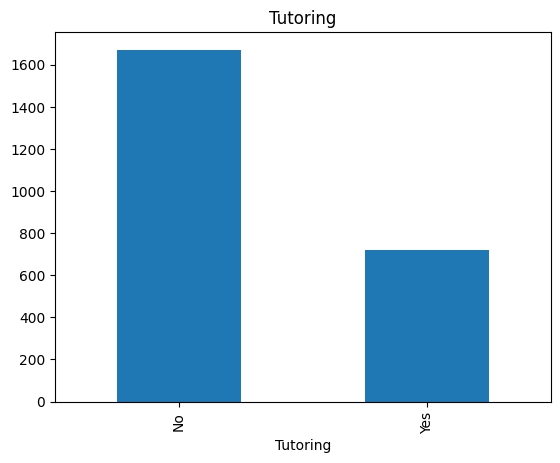

In [16]:
# Feature Tutoring
index_to_bool_map = {0: 'No', 1: 'Yes'}
bool_to_index_map = {'No': 0, 'Yes': 1}
feature = categorical_features[3]
df[feature] = df[feature].map(index_to_bool_map)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Berdasarkan data yang ada, 1671 siswa (69,9%) tidak mengikuti bimbingan belajar dan sisanya 721 (30,1%) mengikuti bimbingan belajar. Hal ini menunjukkan bahwa mayoritas siswa pada data tidak mengikuti bimbingan belajar.

                 jumlah sampel  persentase
ParentalSupport                           
Moderate                   740        30.9
High                       697        29.1
Low                        489        20.4
Very High                  254        10.6
None                       212         8.9


<Axes: title={'center': 'ParentalSupport'}, xlabel='ParentalSupport'>

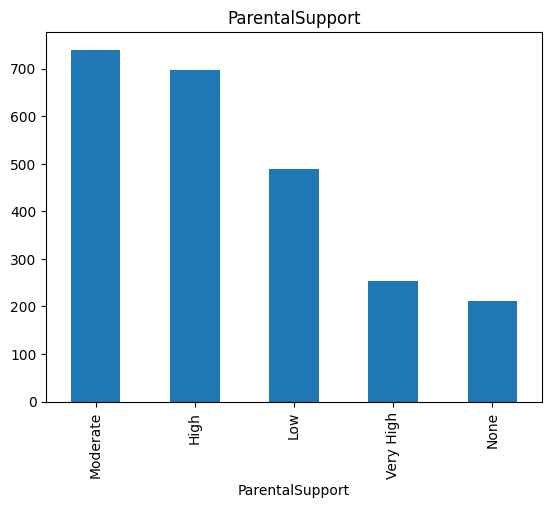

In [17]:
'''
Feature Parental Support
ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High
'''
index_to_parental_support = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
parental_support_to_index = {'None': 0, 'Low': 1, 'Moderate': 2,'High': 3,'Very High': 4}
feature = categorical_features[4]
df[feature] = df[feature].map(index_to_parental_support)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Data dari kolom ParentalSupport terdiri dari Moderate sebanyak 740 sampel (30,9%), High sebanyak 697 sampel (29,1%), Low sebanyak 489 sampel (20,4%), Very High sebanyak 254 sampel (10,6%), None sebanyak 212 (8,9%). Hal ini menunjukkan bahwa support dari orang tua cenderung tinggi.

                 jumlah sampel  persentase
Extracurricular                           
No                        1475        61.7
Yes                        917        38.3


<Axes: title={'center': 'Extracurricular'}, xlabel='Extracurricular'>

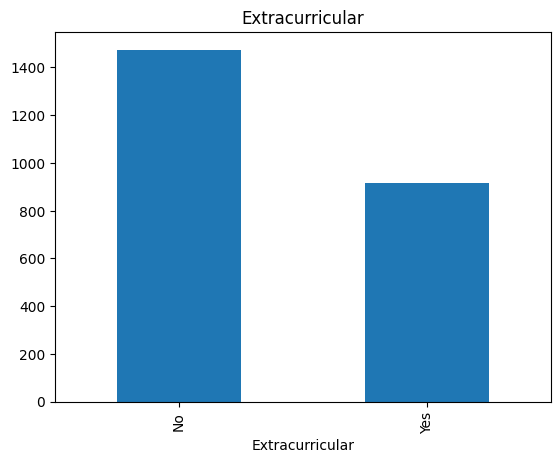

In [18]:
# Feature Extracurricular
index_to_bool_map = {0: 'No', 1: 'Yes'}
feature = categorical_features[5]
df[feature] = df[feature].map(index_to_bool_map)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Data dari kolom Extracurricular menunjukkan sebagian besar tidak mengikuti ekstrakurikuler, yaitu sebanyak 1475 (61,7%) dan sisanya yang mengikuti ekstrakurikuler sebanyak 917 (38,3%).

        jumlah sampel  persentase
Sports                           
No               1666        69.6
Yes               726        30.4


<Axes: title={'center': 'Sports'}, xlabel='Sports'>

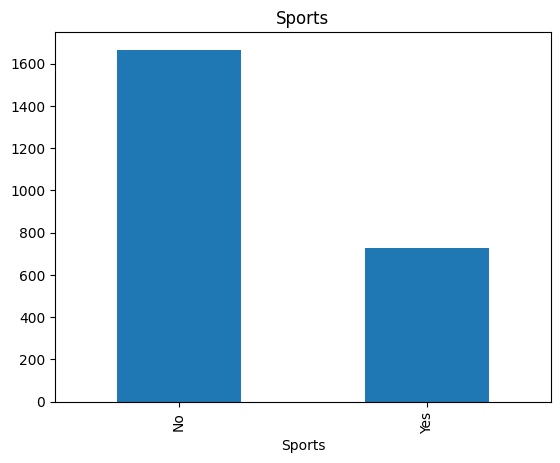

In [19]:
# Feature Sports
index_to_bool_map = {0: 'No', 1: 'Yes'}
feature = categorical_features[6]
df[feature] = df[feature].map(index_to_bool_map)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Data dari kolom sports menunjukkan sebagian besar tidak mengikuti kegiatan olahraga, yaitu sebanyak 1666 (69,6%) dan yang mengikuti kegiatan olahraga sebanyak 726 (30,4%).

       jumlah sampel  persentase
Music                           
No              1921        80.3
Yes              471        19.7


<Axes: title={'center': 'Music'}, xlabel='Music'>

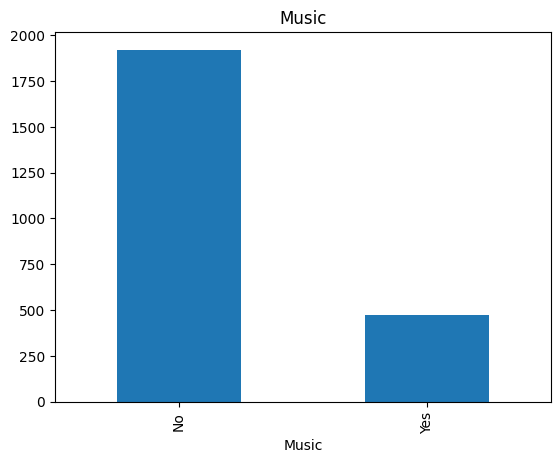

In [20]:
# Feature Music
index_to_bool_map = {0: 'No', 1: 'Yes'}
feature = categorical_features[7]
df[feature] = df[feature].map(index_to_bool_map)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Persentase siswa yang mengikuti kegiatan musik sebanyak 80,3% (1921 sampel) dan yang tidak mengikuti sebanyak 19,7% (471 sampel). Hal ini menunjukkan bahwa dari data, hanya sedikit siswa yang mengikuti kegiatan musik.

              jumlah sampel  persentase
Volunteering                           
No                     2016        84.3
Yes                     376        15.7


<Axes: title={'center': 'Volunteering'}, xlabel='Volunteering'>

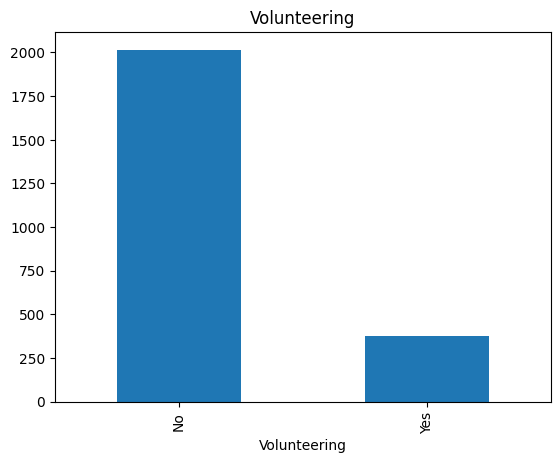

In [21]:
# Feature Volunteering
index_to_bool_map = {0: 'No', 1: 'Yes'}
feature = categorical_features[8]
df[feature] = df[feature].map(index_to_bool_map)
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_temp = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_temp)
count.plot(kind='bar', title=feature)

Persentase siswa yang mengikuti kegiatan volunteering sebanyak 84,3% (2016 sampel) dan yang tidak mengikuti sebanyak 15,7% (376 sampel)

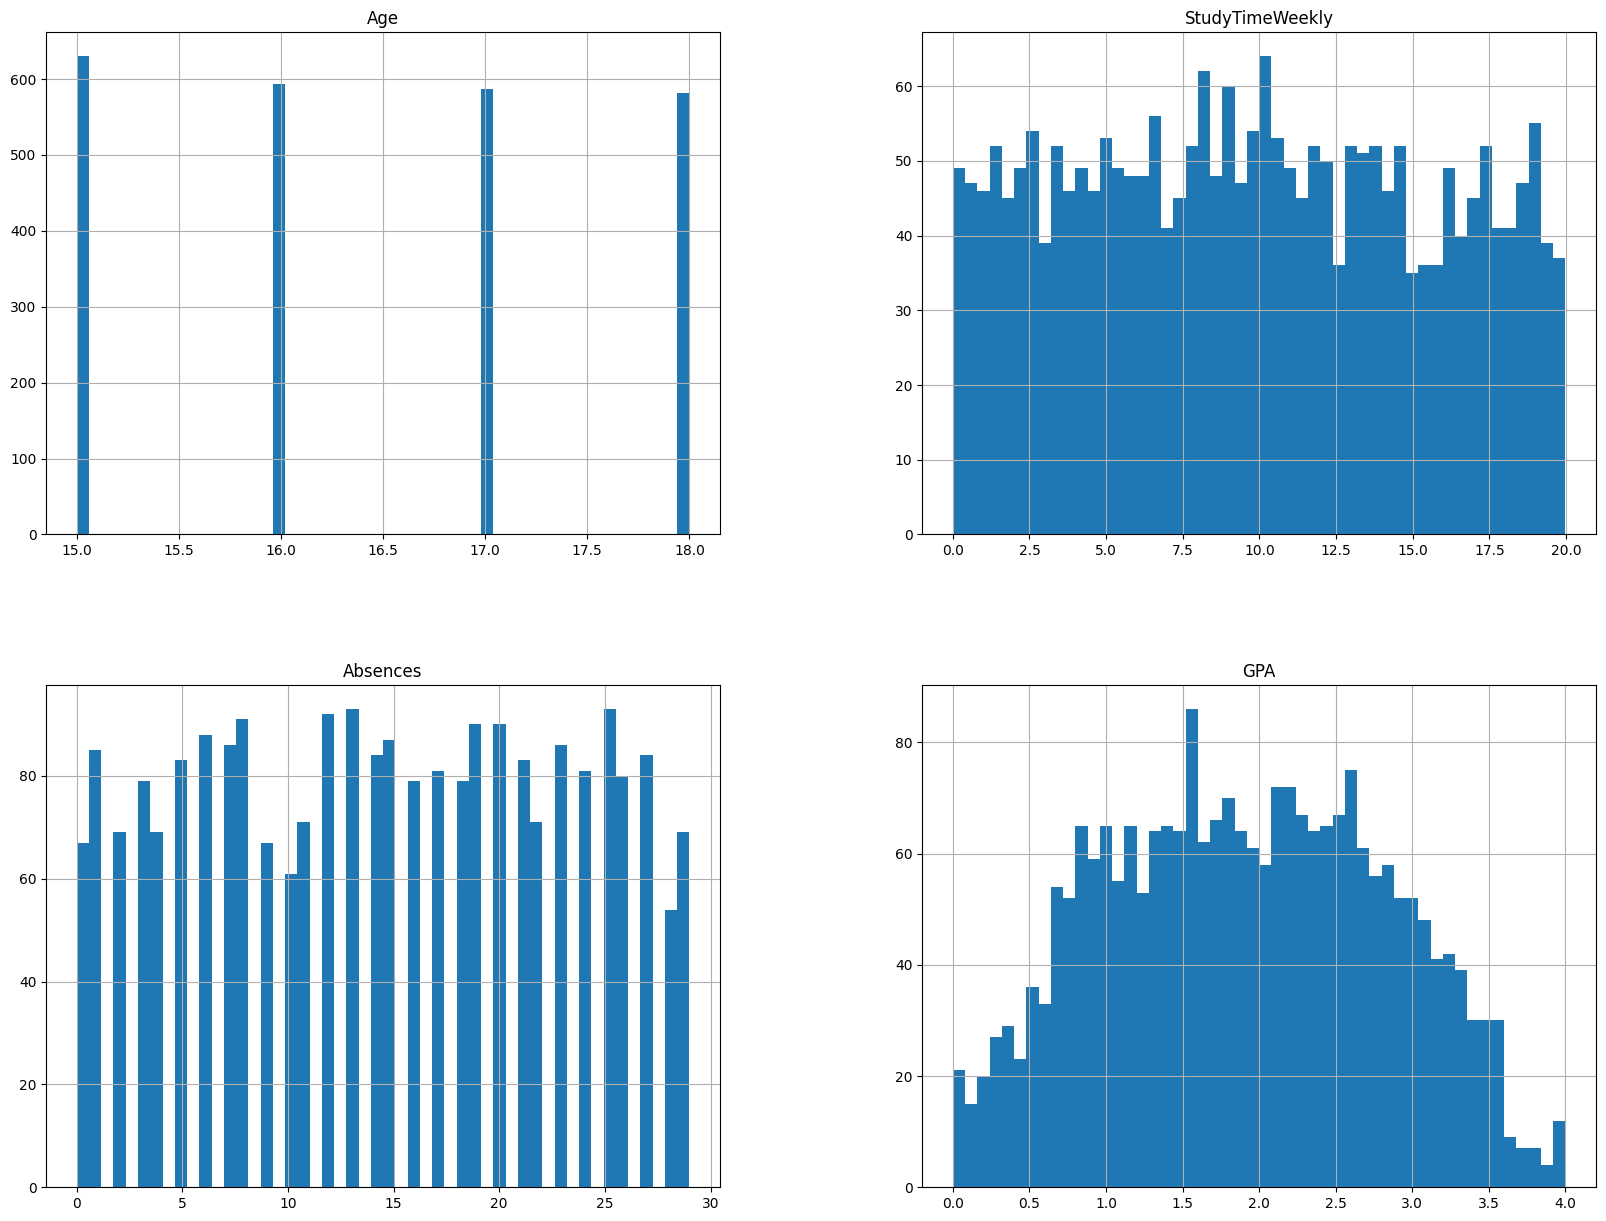

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Penyebaran Age, StudyTimeWeekly, dan Absences terdistribusi secara merata. <br>
Penyebaran GPA berbentuk seperti lonceng (distribusi normal) dengan mayoritas data berada di antara 1,0 hingga 3,0.

/tmp/ipykernel_20554/2441769417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
/tmp/ipykernel_20554/2441769417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
/tmp/ipykernel_20554/2441769417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
/tmp/ipykernel_20554/2

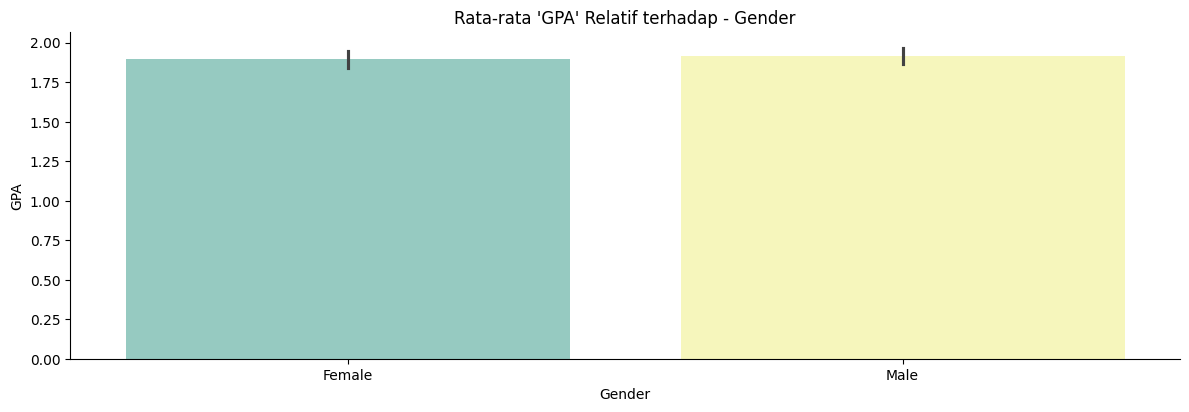

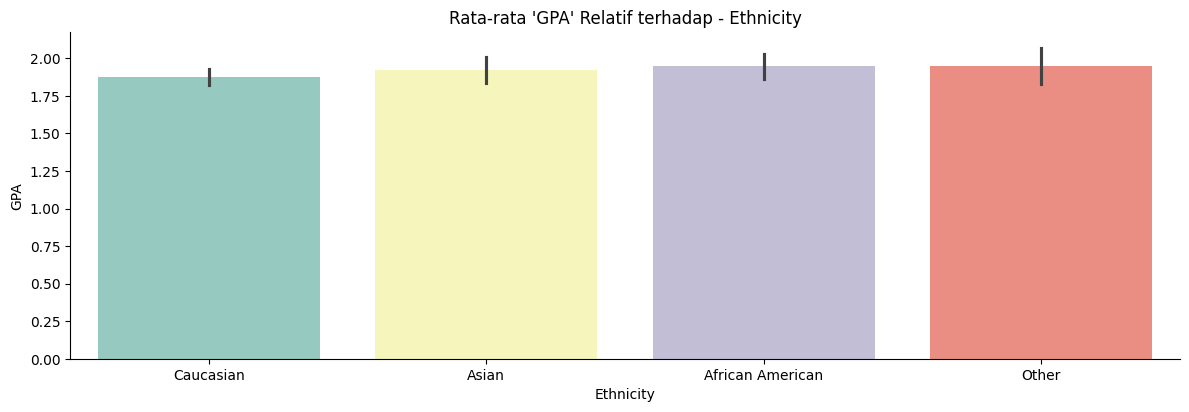

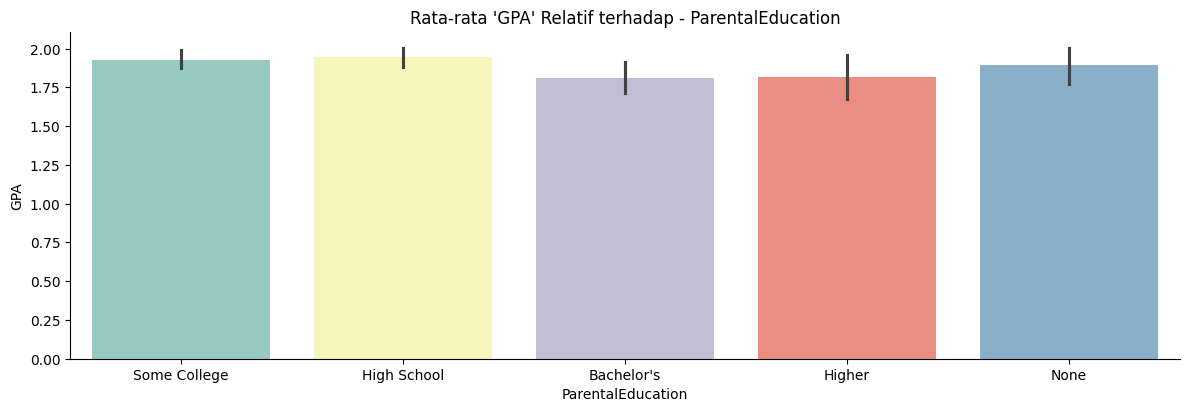

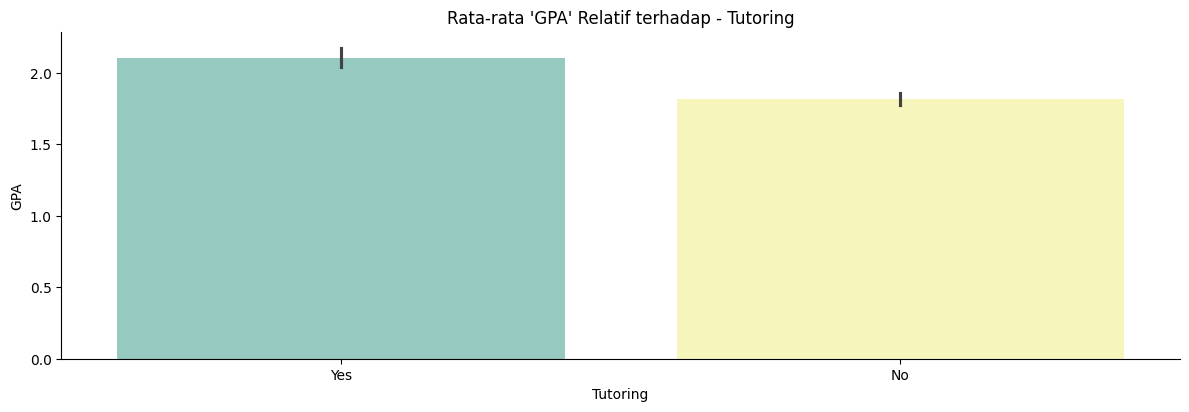

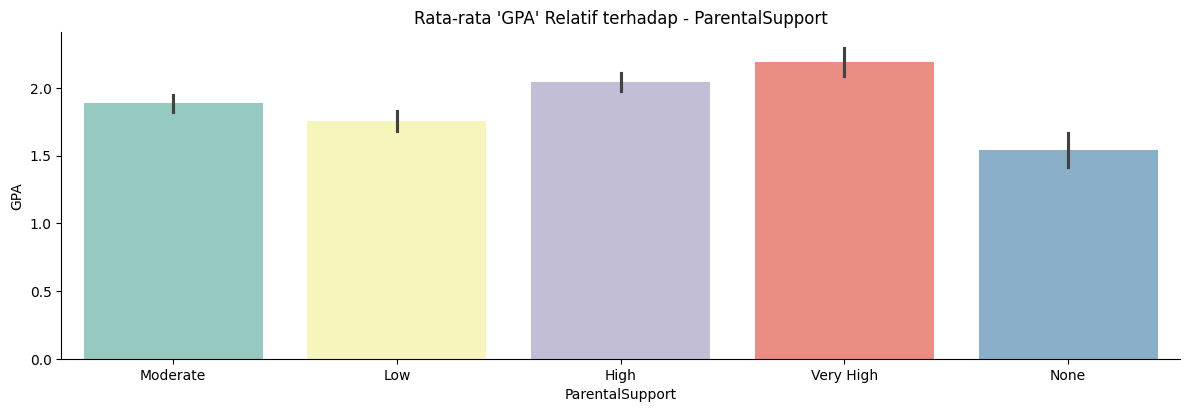

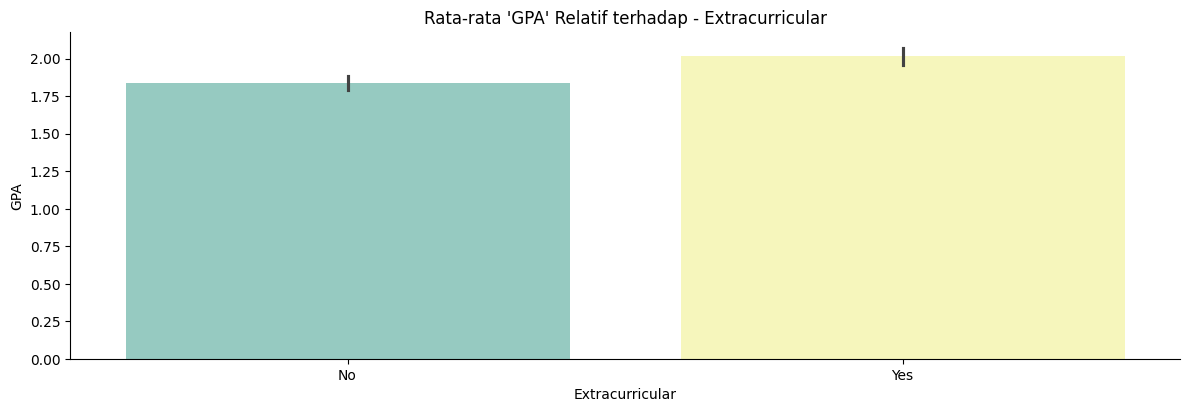

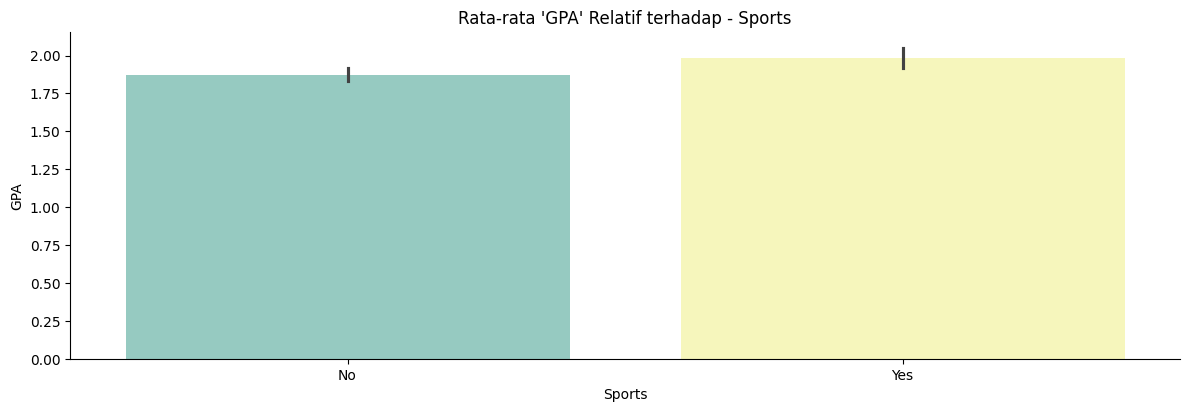

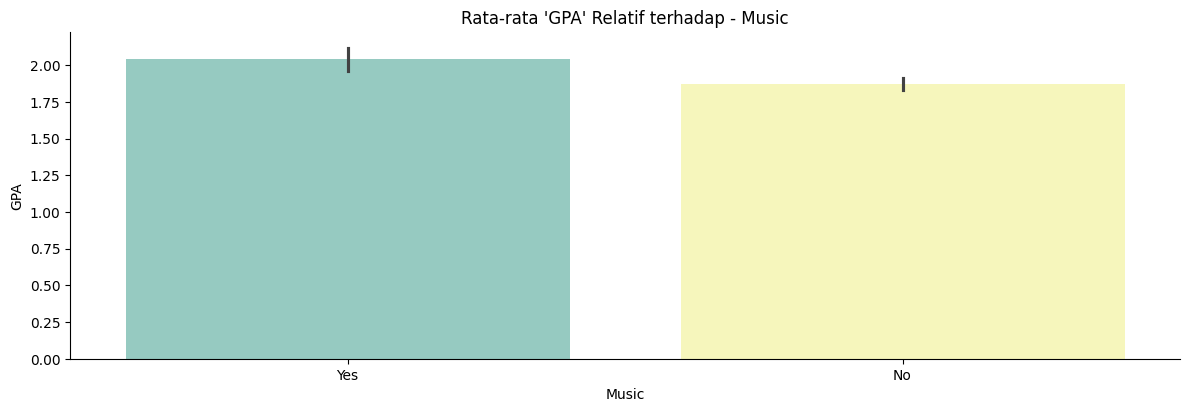

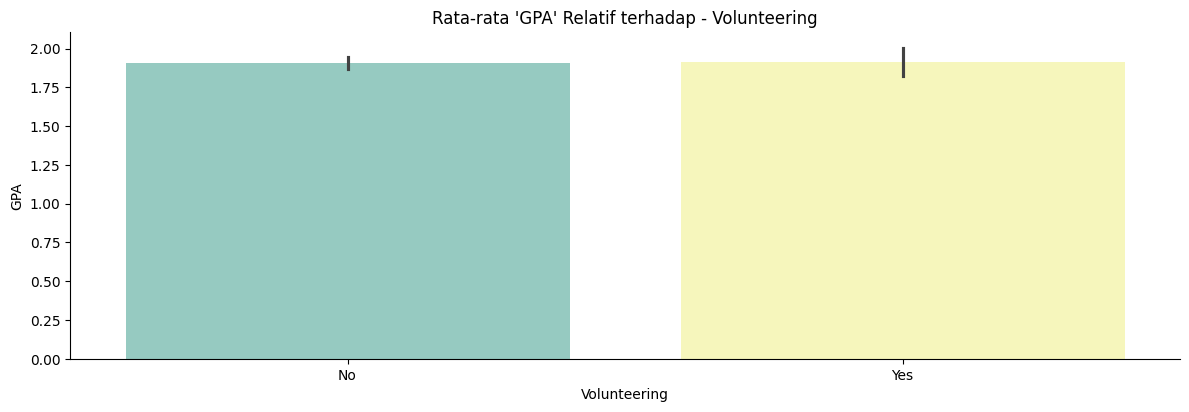

In [23]:
# Exploratory Data Analysis - Multivariate Analysis
cat_features = df.select_dtypes(include='object').columns.to_list()
    
for col in cat_features:
    sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
    plt.title("Rata-rata 'GPA' Relatif terhadap - {}".format(col))

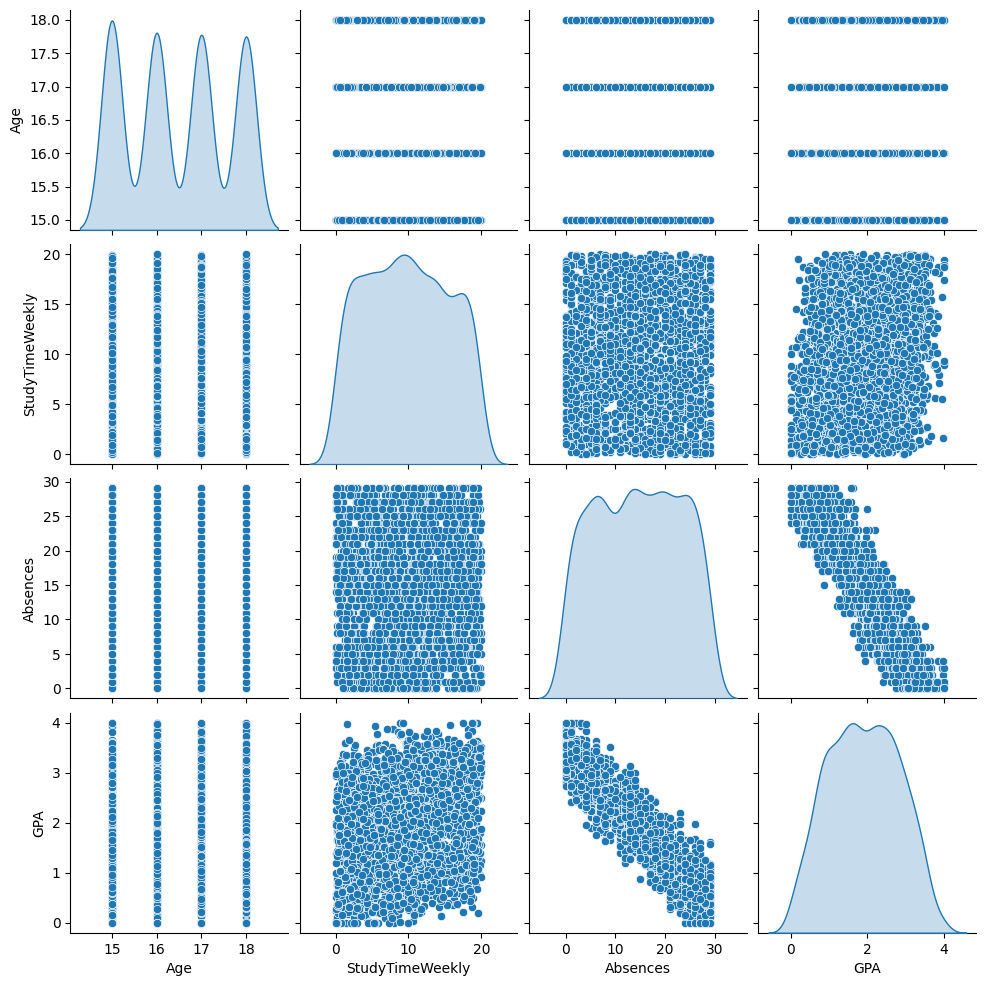

In [24]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

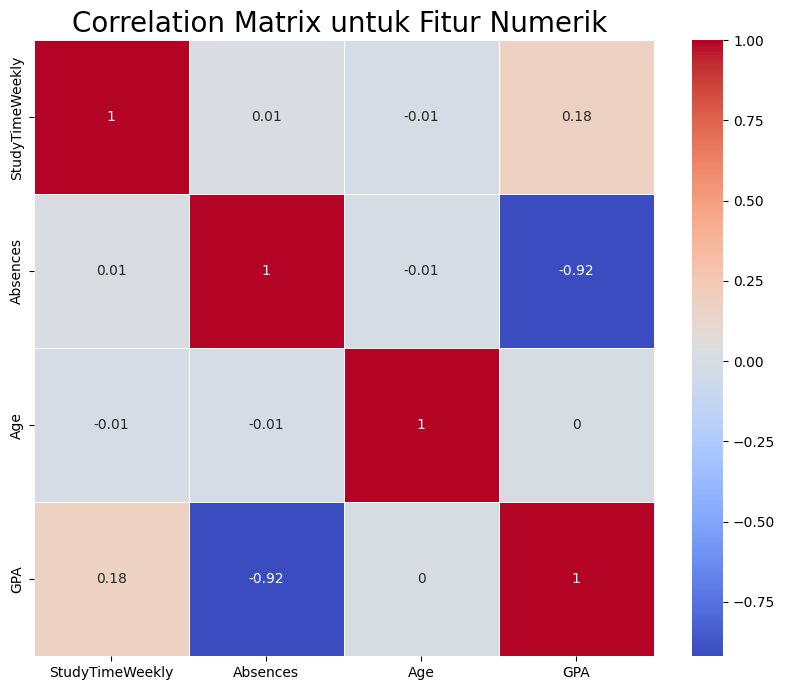

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Fitur Age, Gender, Ethnicity, dan Volunteering memiliki korelasi sangat kecil terhadap GPA sehingga bisa dihiraukan (drop). <br>
Fitur Absences menjadi fitur yang paling berpengaruh terhadap GPA dengan 0.92 poin pada bagian Correlation Matrix

In [26]:
# Fitur age, gender, ethnicity, volunteering memiliki korelasi sangat kecil sehingga bisa didrop
df.drop(['Age','Gender','Ethnicity','Volunteering'], inplace=True, axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   object 
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   int64  
 3   Tutoring           2392 non-null   object 
 4   ParentalSupport    2392 non-null   object 
 5   Extracurricular    2392 non-null   object 
 6   Sports             2392 non-null   object 
 7   Music              2392 non-null   object 
 8   GPA                2392 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 168.3+ KB


#### Data Preparation

Persiapan data awal dilakukan dengan mengembalikan bentuk data kategorikal yang sebelumnya telah diubah dalam bentuk kalimat kembali menjadi bentuk numerik karena model bekerja lebih baik dengan bentuk numerik.

In [28]:
# Mengembalikan ke index untuk persiapan training
df['ParentalEducation'] = df['ParentalEducation'].map(parental_education_to_index)
df['Tutoring'] = df['Tutoring'].map(bool_to_index_map)
df['ParentalSupport'] = df['ParentalSupport'].map(parental_support_to_index)
df['Extracurricular'] = df['Extracurricular'].map(bool_to_index_map)
df['Sports'] = df['Sports'].map(bool_to_index_map)
df['Music'] = df['Music'].map(bool_to_index_map)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   int64  
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   int64  
 3   Tutoring           2392 non-null   int64  
 4   ParentalSupport    2392 non-null   int64  
 5   Extracurricular    2392 non-null   int64  
 6   Sports             2392 non-null   int64  
 7   Music              2392 non-null   int64  
 8   GPA                2392 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 168.3 KB


Pada sel di bawah ini, dilakukan pemisahan antara variabel x dan y. Variabel x akan menyimpan fitur yang akan digunakan sebagai prediksi berupa ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, dan Music. Variabel y akan menjadi variabel target yang menyimpan GPA. Selanjutnya dilakukan split dengan rasio train 70% dan test 30%. Rasio 0.3 dipilih karena memberikan hasil percobaan terbaik di antara test_size 0.4, 0.3, dan 0.2.

In [29]:
from sklearn.model_selection import train_test_split
    
X = df.drop(["GPA"],axis=1)
y = df["GPA"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

X.info() di bawah dilakukan untuk pengecekan apakah isi dari X sudah sesuai dengan yang diinginkan.

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   int64  
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   int64  
 3   Tutoring           2392 non-null   int64  
 4   ParentalSupport    2392 non-null   int64  
 5   Extracurricular    2392 non-null   int64  
 6   Sports             2392 non-null   int64  
 7   Music              2392 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 149.6 KB


y.info() di bawah dilakukan untuk pengecekan apakah isi dari y sudah sesuai dengan yang diinginkan.

In [31]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2392 entries, 0 to 2391
Series name: GPA
Non-Null Count  Dtype  
--------------  -----  
2392 non-null   float64
dtypes: float64(1)
memory usage: 18.8 KB


In [32]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2392
Total # of sample in train dataset: 1674
Total # of sample in test dataset: 718


Hasil pemisahan menunjukkan dari awal 2392 data, dipisah menjadi 1674 data train dan 718 data test. <br>
Sel di bawah ini, menunjukkan proses standarisasi. fit_transform diterapkan pada data training untuk menghitung parameter statistik (mean dan standar deviasi) serta mentransformasi data, sedangkan transform diterapkan pada data test menggunakan parameter yang dihitung dari data training untuk menjaga konsistensi.

In [33]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['StudyTimeWeekly', 'Absences']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_train[numerical_features].head()

,StudyTimeWeekly,Absences
267,0.536441,1.587755
2059,-0.438987,-0.649041
653,-1.395209,-0.884493
2004,-0.220595,0.763672
2097,-0.390049,0.410494


In [34]:
X_train[numerical_features].describe().round(3)

,StudyTimeWeekly,Absences
count,1674.000,1674.000
mean,0.000,-0.000
std,1.000,1.000
min,-1.728,-1.709
25%,-0.843,-0.884
50%,-0.021,-0.060
75%,0.818,0.881
max,1.781,1.705


Hasil menunjukkan bahwa data telah terstandarisasi.

#### Model Development

Model pertama yang akan dicoba adalah KNN (K-Nearest Neigbors) yang dibantu dengan Grid Search Cross Val. Grid Search Cross Val merupakan metode untuk melakukan hyperparameter tuning dengan mencoba semua kombinasi parameter yang ditentukan dalam sebuah grid dan mengevaluasi performanya menggunakan cross-validation. 
Parameter yang bisa diatur untuk KNN pada proyek ini adalah: 
- `n_neighbors` : jumlah k (tetangga) yang dipilih untuk membuat prediksi
- `weights` : menentukan kontribusi setiap tetangga dalam memengaruhi prediksi. Uniform berarti semua tetangga memiliki bobot yang sama, terlepas dari jaraknya. 

In [35]:
# dataframe untuk menyimpan hasil
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'GradientBoosting','XGBoost'])
# Percobaan dengan KNN dengan Grid Search Cross Val untuk hypertuning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Definisikan rentang nilai untuk n_neighbors
param_grid = {'n_neighbors': range(1, 30), 'weights': ['uniform','distance']} 
# Buat objek KNN dan GridSearchCV
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

print("Best n_neighbors:", best_k)
print("Best weights:", best_weights)
print("Best cross-validated MSE:", -grid_search.best_score_)

knn_best = grid_search.best_estimator_
print("Best k:", best_k)
train_mse = mean_squared_error(y_train, knn_best.predict(X_train))
print("Train MSE:", train_mse)
test_mse = mean_squared_error(y_test, knn_best.predict(X_test))
print("Test MSE:", test_mse)
models.loc['train_mse','KNN'] = train_mse
models.loc['test_mse','KNN'] = test_mse
models

Best n_neighbors: 16
Best weights: distance
Best cross-validated MSE: 0.07808246633956835
Best k: 16
Train MSE: 0.0
Test MSE: 0.07741318009646177


,KNN,RandomForest,GradientBoosting,XGBoost
train_mse,0.0,NaN,NaN,NaN
test_mse,0.077413,NaN,NaN,NaN


Model kedua yang akan dicoba adalah Random Forest Regressor. Parameter yang diatur dalam RandomForestRegressor sebagai berikut.
Parameter yang diatur dalam RandomForestRegressor pada proyek ini sebagai berikut.
- `n_estimator`: jumlah Decision Tree yang akan dibuat dalam Random Forest.
- `max_depth`: batas maksimum kedalaman tiap tree. Mengatur kedalaman dapat mencegah overfitting dengan membatasi kompleksitas tree. Nilai yang terlalu kecil dapat menyebabkan underfitting.
- `min_samples_split`: jumlah minimum data sample yang diperlukan untuk membagi node internal.
- `min_samples_leaf`: jumlah minimum data sample yang diperlukan untuk membentuk leaf (node terminal)
- `max_features`: jumlah maksimum fitur yang dipertimbangkan untuk pembagian di setiap node. Ini membantu memperkenalkan variasi antar tree dalam random forest. 
  - sqrt: akar kuadrat dari total fitur
  - log2: logaritma dasar 2 dari total fitur

In [36]:
from sklearn.ensemble import RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],   # Minimal sampel untuk membagi simpul pohon
    'min_samples_leaf': [1, 2, 4],     # Minimal sampel di setiap daun
    'max_features': ['sqrt', 'log2'] 
}
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Hasil terbaik untuk RandomForest
best_rf_params = grid_search_rf.best_params_
print("Best RandomForest Parameters:", best_rf_params)
print("Best cross-validated MSE for RandomForest:", -grid_search_rf.best_score_)

# Model terbaik untuk RandomForest
rf_best = grid_search_rf.best_estimator_

# Hitung MSE untuk training dan testing
train_mse_rf = mean_squared_error(y_train, rf_best.predict(X_train))
test_mse_rf = mean_squared_error(y_test, rf_best.predict(X_test))

# Simpan hasil ke dalam dataframe
models.loc['train_mse', 'RandomForest'] = train_mse_rf
models.loc['test_mse', 'RandomForest'] = test_mse_rf

# Tampilkan hasil dataframe
print(models)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best RandomForest Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validated MSE for RandomForest: 0.056103227833959504
                KNN RandomForest GradientBoosting XGBoost
train_mse       0.0     0.007555              NaN     NaN
test_mse   0.077413     0.055462              NaN     NaN


Model ketiga yang dicoba adalah Gradient Boosting Regressor. Hyperparameter yang dituning dengan Grid Search Cross Validation sebagai berikut.
- `n_estimators`: jumlah Decision Tree yang akan dibuat dalam Gradient Boosting Regressor.
- `learning_rate`: mengontrol kontribusi setiap tree dalam memperbaiki kesalahan
- `max_depth`: kedalaman maksimum setiap tree

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [50,100, 200, 300],
    'learning_rate': [1.0, 0.1, 0.01, 0.001],
    'max_depth': [2,3,4]
}
gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Hasil terbaik untuk GradientBoostingRegressor
best_gb_params = grid_search_gb.best_params_
print("Best GradientBoosting Parameters: ", best_gb_params)
print("Best cross-validated MSE for GradientBoosting:", -grid_search_gb.best_score_)
gb_best = grid_search_gb.best_estimator_

# Hitung MSE untuk training dan testing
train_mse_gb = mean_squared_error(y_train, gb_best.predict(X_train))
test_mse_gb = mean_squared_error(y_test, gb_best.predict(X_test))

# Simpan hasil ke dalam dataframe
models.loc['train_mse', 'GradientBoosting'] = train_mse_gb
models.loc['test_mse', 'GradientBoosting'] = test_mse_gb

# Tampilkan hasil dataframe
models

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best GradientBoosting Parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Best cross-validated MSE for GradientBoosting: 0.04330606590407221


,KNN,RandomForest,GradientBoosting,XGBoost
train_mse,0.0,0.007555,0.033964,NaN
test_mse,0.077413,0.055462,0.041823,NaN


Model keempat yang dicoba adalah XGB Regressor yang merupakan versi tingkatan dari Gradient Boosting Regressor. Parameter yang dituning sebagai berikut.
- `n_estimators`: jumlah tree (decision trees) yang akan dibuat oleh model
- `learning_rate`: mengontrol kontribusi setiap tree dalam memperbaiki kesalahan
- `max_depth`: kedalaman maksimum setiap tree
- `subsample`: proporsi data yang digunakan untuk melatih setiap tree
- `colsample_bytree`: proporsi fitur yang dipilih secara acak untuk digunakan dalam pembentukan setiap tree

In [39]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [1.0, 0.1, 0.01, 0.001],
    'max_depth': [3,5,7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7,0.8,0.9]
}
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Hasil terbaik untuk GradientBoostingRegressor
best_xgb_params = grid_search_xgb.best_params_
print("Best XGBoost Parameters: ", best_xgb_params)
print("Best cross-validated MSE for XGBoost:", -grid_search_xgb.best_score_)
xgb_best = grid_search_xgb.best_estimator_

# Hitung MSE untuk training dan testing
train_mse_xgb = mean_squared_error(y_train, xgb_best.predict(X_train))
test_mse_xgb = mean_squared_error(y_test, xgb_best.predict(X_test))

# Simpan hasil ke dalam dataframe
models.loc['train_mse', 'XGBoost'] = train_mse_xgb
models.loc['test_mse', 'XGBoost'] = test_mse_xgb

# Tampilkan hasil dataframe
models

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGBoost Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validated MSE for XGBoost: 0.04293767080454067


,KNN,RandomForest,GradientBoosting,XGBoost
train_mse,0.0,0.007555,0.033964,0.033079
test_mse,0.077413,0.055462,0.041823,0.041583


Model terakhir yang dicoba adalah Support Vector Regression. Parameter yang dituning dari SVR sebagai berikut.
- `C`: parameter regularisasi yang mengontrol keseimbangan antara kesalahan di training data dan margin.
- `epsilon`: zona toleransi (margin) di sekitar prediksi model. Error tidak dihitung selama prediksi berada dalam batas tersebut.
- `gamma`: parameter kernel yang memengaruhi cakupan pengaruh setiap data point pada model.

In [40]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
param_grid_svr = {
    'C': [0.1, 1, 10, 100],           # Range nilai C
    'epsilon': [0.01, 0.1, 0.2, 0.5], # Range nilai epsilon
    'gamma': ['scale', 'auto', 0.1, 1] # Pilihan gamma: scale, auto, atau angka
}
grid_search_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search_svr.fit(X_train, y_train)

# Hasil terbaik untuk GradientBoostingRegressor
best_svr_params = grid_search_svr.best_params_
print("Best SupportVectorRegression Parameters: ", best_svr_params)
print("Best cross-validated MSE for SupportVectorRegression:", -grid_search_svr.best_score_)
svr_best = grid_search_svr.best_estimator_

# Hitung MSE untuk training dan testing
train_mse_svr = mean_squared_error(y_train, svr_best.predict(X_train))
test_mse_svr = mean_squared_error(y_test, svr_best.predict(X_test))

# Simpan hasil ke dalam dataframe
models.loc['train_mse', 'SupportVectorRegression'] = train_mse_svr
models.loc['test_mse', 'SupportVectorRegression'] = test_mse_svr

# Tampilkan hasil dataframe
models

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best SupportVectorRegression Parameters:  {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Best cross-validated MSE for SupportVectorRegression: 0.04316792974427414


,KNN,RandomForest,GradientBoosting,XGBoost,SupportVectorRegression
train_mse,0.0,0.007555,0.033964,0.033079,0.035521
test_mse,0.077413,0.055462,0.041823,0.041583,0.042754


Berdasarkan tabel di atas, didapatkan informasi sebagai berikut:
- hasil model terbaik adalah **XGBoost** dengan test_mse terkecil yaitu 0.041823. Nilai 0.041823 jika digunakan untuk prediksi GPA dalam rentang 0.0 hingga 4.0 menunjukkan hasil yang baik. 
- test_mse yang baik menunjukkan bahwa model memberi performa yang baik dalam situasi di dunia nyata. 
- Hasil KNN dengan train_mse yang kecil tetapi tidak sebanding dengan test_mse menunjukkan bahwa model cenderung overfit. 